<a href="https://colab.research.google.com/github/ajay-richardson/Sentiment-Analysis---Major-Project/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#import dataset containing tweets to an airline
raw_data = pd.read_csv("https://raw.githubusercontent.com/ajay-richardson/Sentiment-Analysis---Major-Project/main/Tweets.csv")
raw_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
#create required dataframe from raw data
list = ['airline_sentiment','text']
df = raw_data[list]
df.rename(columns = {'airline_sentiment':'label','text':'tweet'},inplace = True)
df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,label,tweet
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [ ]:
df.shape

(14640, 2)

In [ ]:
len(df)

14640

In [ ]:
import string
#convert all text to lowercase
df.tweet = df.tweet.apply(lambda x:x.lower())
df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,label,tweet
0,neutral,@virginamerica what @dhepburn said.
1,positive,@virginamerica plus you've added commercials t...
2,neutral,@virginamerica i didn't today... must mean i n...
3,negative,@virginamerica it's really aggressive to blast...
4,negative,@virginamerica and it's a really big bad thing...


In [ ]:
df.tweet[2]

"@virginamerica i didn't today... must mean i need to take another trip!"

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import tokenize

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB

In [ ]:
punctuations = [string.punctuation]
punctuations

['!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~']

In [ ]:
def remove_punctuations(text):
  for punctuation in string.punctuation:
      text = text.replace(punctuation,'')
  return text    

In [ ]:
#removing punctuation in text 
df.tweet = df.tweet.apply(remove_punctuations)
df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,label,tweet
0,neutral,virginamerica what dhepburn said
1,positive,virginamerica plus youve added commercials to ...
2,neutral,virginamerica i didnt today must mean i need t...
3,negative,virginamerica its really aggressive to blast o...
4,negative,virginamerica and its a really big bad thing a...


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = stopwords.words('english')

In [ ]:
#removing stopwords
df.tweet = df.tweet.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df.tweet

0                              virginamerica dhepburn said
1        virginamerica plus youve added commercials exp...
2        virginamerica didnt today must mean need take ...
3        virginamerica really aggressive blast obnoxiou...
4                       virginamerica really big bad thing
                               ...                        
14635       americanair thank got different flight chicago
14636    americanair leaving 20 minutes late flight war...
14637    americanair please bring american airlines bla...
14638    americanair money change flight dont answer ph...
14639    americanair 8 ppl need 2 know many seats next ...
Name: tweet, Length: 14640, dtype: object

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
  #create new column with tokenized sentences
  df['tweet_tokenized'] = df.tweet.apply(lambda x: word_tokenize(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.tweet_tokenized.head()

0                      [virginamerica, dhepburn, said]
1    [virginamerica, plus, youve, added, commercial...
2    [virginamerica, didnt, today, must, mean, need...
3    [virginamerica, really, aggressive, blast, obn...
4             [virginamerica, really, big, bad, thing]
Name: tweet_tokenized, dtype: object

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#lemmatization of each individual sentence
lemmatizer = WordNetLemmatizer()
df['tweet_lemmatized'] = df.tweet_tokenized.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df

,label,tweet,tweet_tokenized,tweet_lemmatized,tweet_lemmatized_train
0,neutral,virginamerica dhepburn said,"[virginamerica, dhepburn, said]","[virginamerica, dhepburn, said]",virginamerica dhepburn said
1,positive,virginamerica plus youve added commercials exp...,"[virginamerica, plus, youve, added, commercial...","[virginamerica, plus, youve, added, commercial...",virginamerica plus youve added commercial expe...
2,neutral,virginamerica didnt today must mean need take ...,"[virginamerica, didnt, today, must, mean, need...","[virginamerica, didnt, today, must, mean, need...",virginamerica didnt today must mean need take ...
3,negative,virginamerica really aggressive blast obnoxiou...,"[virginamerica, really, aggressive, blast, obn...","[virginamerica, really, aggressive, blast, obn...",virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing,"[virginamerica, really, big, bad, thing]","[virginamerica, really, big, bad, thing]",virginamerica really big bad thing
...,...,...,...,...,...
14635,positive,americanair thank got different flight chicago,"[americanair, thank, got, different, flight, c...","[americanair, thank, got, different, flight, c...",americanair thank got different flight chicago
14636,negative,americanair leaving 20 minutes late flight war...,"[americanair, leaving, 20, minutes, late, flig...","[americanair, leaving, 20, minutes, late, flig...",americanair leaving 20 minute late flight warn...
14637,neutral,americanair please bring american airlines bla...,"[americanair, please, bring, american, airline...","[americanair, please, bring, american, airline...",americanair please bring american airline blac...
14638,negative,americanair money change flight dont answer ph...,"[americanair, money, change, flight, dont, ans...","[americanair, money, change, flight, dont, ans...",americanair money change flight dont answer ph...


In [ ]:
df['tweet_lemmatized_train'] = df.tweet_lemmatized.apply(lambda x: ' '.join(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X = df['tweet_lemmatized_train']
y = df['label']

In [ ]:
df

,label,tweet,tweet_tokenized,tweet_lemmatized,tweet_lemmatized_train
0,neutral,virginamerica dhepburn said,"[virginamerica, dhepburn, said]","[virginamerica, dhepburn, said]",virginamerica dhepburn said
1,positive,virginamerica plus youve added commercials exp...,"[virginamerica, plus, youve, added, commercial...","[virginamerica, plus, youve, added, commercial...",virginamerica plus youve added commercials exp...
2,neutral,virginamerica didnt today must mean need take ...,"[virginamerica, didnt, today, must, mean, need...","[virginamerica, didnt, today, must, mean, need...",virginamerica didnt today must mean need take ...
3,negative,virginamerica really aggressive blast obnoxiou...,"[virginamerica, really, aggressive, blast, obn...","[virginamerica, really, aggressive, blast, obn...",virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing,"[virginamerica, really, big, bad, thing]","[virginamerica, really, big, bad, thing]",virginamerica really big bad thing
...,...,...,...,...,...
14635,positive,americanair thank got different flight chicago,"[americanair, thank, got, different, flight, c...","[americanair, thank, got, different, flight, c...",americanair thank got different flight chicago
14636,negative,americanair leaving 20 minutes late flight war...,"[americanair, leaving, 20, minutes, late, flig...","[americanair, leaving, 20, minutes, late, flig...",americanair leaving 20 minutes late flight war...
14637,neutral,americanair please bring american airlines bla...,"[americanair, please, bring, american, airline...","[americanair, please, bring, american, airline...",americanair please bring american airlines bla...
14638,negative,americanair money change flight dont answer ph...,"[americanair, money, change, flight, dont, ans...","[americanair, money, change, flight, dont, ans...",americanair money change flight dont answer ph...


In [ ]:
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
print('Labels for \'{}\' are \'{}\' respectively.'.format(le.inverse_transform(np.unique(y)),np.unique(y)))

Labels for '['negative' 'neutral' 'positive']' are '[0 1 2]' respectively.


In [ ]:
vect = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
bow_fit = vect.fit(X)
bow = bow_fit.transform(X)
bow

<14640x16481 sparse matrix of type '<class 'numpy.float64'>'
	with 147112 stored elements in Compressed Sparse Row format>

In [ ]:
bow.toarray().shape

(14640, 16481)

In [ ]:
bow.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
vect.inverse_transform(bow.toarray())[1:5]

[array(['added', 'commercials', 'experience', 'plus', 'tacky',
        'virginamerica', 'youve'], dtype='<U46'),
 array(['another', 'didnt', 'mean', 'must', 'need', 'take', 'today',
        'trip', 'virginamerica'], dtype='<U46'),
 array(['aggressive', 'amp', 'blast', 'entertainment', 'faces', 'guests',
        'little', 'obnoxious', 'really', 'recourse', 'virginamerica'],
       dtype='<U46'),
 array(['bad', 'big', 'really', 'thing', 'virginamerica'], dtype='<U46')]

In [ ]:
feature_names = np.array(vect.get_feature_names())
sorted_by_idf = np.argsort(vect.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:10]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-10:]]))

Features with lowest idf:
['united' 'flight' 'usairways' 'americanair' 'southwestair' 'jetblue'
 'get' 'thanks' 'cancelled' 'service']

Features with highest idf:
['hgeronemus' 'hhagerty' 'hiccups' 'hid' 'higgs' 'highbuddyyy'
 'higherandhigher' 'highhopes' 'hike' 'zurichnew']


In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV, validation_curve
X_train,X_test,y_train,y_test = train_test_split(bow,y,random_state=42)

In [ ]:
#find best value of alpha using GridSearchCV
from sklearn.model_selection import GridSearchCV
n = np.arange(0,2,0.25)
param = {'alpha': n}
model = MultinomialNB()
model_grid = GridSearchCV(model,param)
model_grid.fit(bow,y)
model_grid.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


{'alpha': 1.75}

In [ ]:
mnb = MultinomialNB(alpha = 1.75)
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
#Labels for '['negative' 'neutral' 'positive']' are '[0 1 2]' respectively.

In [ ]:
y_pred

array([2, 0, 0, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracy_score(y_pred,y_test)

0.7062841530054644

In [ ]:
!pip install scikit-plot


 Confusion matrix: 



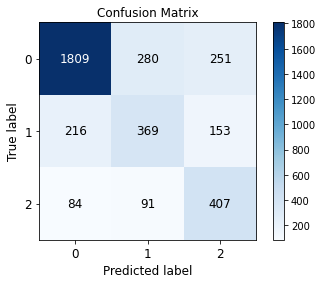

In [ ]:
import scikitplot as skplt
print ("\n Confusion matrix: \n")
skplt.metrics.plot_confusion_matrix(y_test, y_pred, title="Confusion Matrix",
                text_fontsize='large')
plt.show()

In [ ]:
#Calculate classification model evaluation metrics like precision, recall, f1 score
report = classification_report(y_test, y_pred)
print("\n Classification report::\n", classification_report(y_test, y_pred))


 Classification report::
               precision    recall  f1-score   support

           0       0.86      0.77      0.81      2340
           1       0.50      0.50      0.50       738
           2       0.50      0.70      0.58       582

    accuracy                           0.71      3660
   macro avg       0.62      0.66      0.63      3660
weighted avg       0.73      0.71      0.71      3660



In [ ]:
#average accuracy of model found using cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, bow, y, cv = 5)
np.mean(scores)

0.6767076502732241